In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#create default styles for seaborn plots
#sns.set()

In [3]:
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy

In [4]:
df=pd.read_csv("Insurance Data Analysis.csv")

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
#get overview information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
#check for number of null values per feature
df.isna().apply(pd.value_counts)

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


<AxesSubplot:xlabel='charges'>

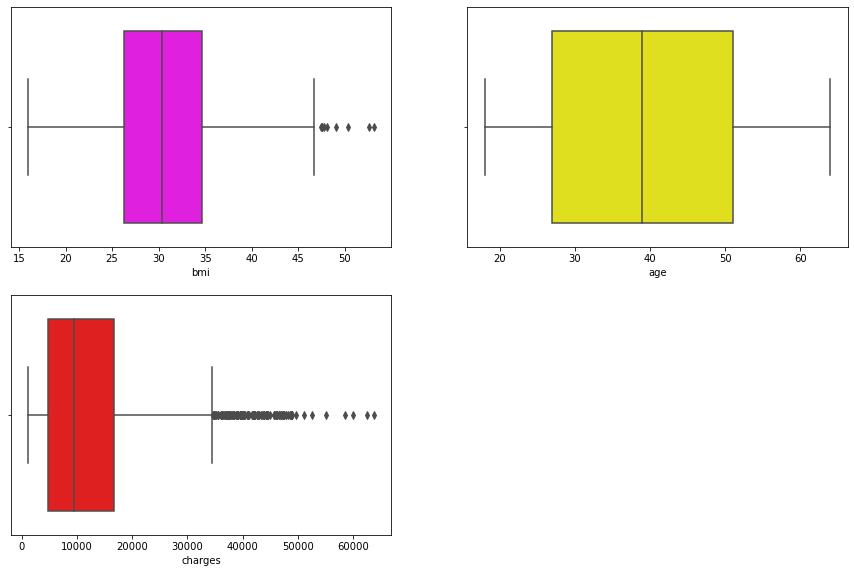

In [9]:
#check for outliers by help of Box Plots
plt.figure(figsize=(15,15))

#1st subplot of (3,2) dimensions
plt.subplot(3,2,1)
sns.boxplot(x=df.bmi,color="magenta")

#2nd subplot of (3,2) dimensions
plt.subplot(3,2,2)
sns.boxplot(x=df.age,color="yellow")

#3rd subplot of (3,2) dimensions
plt.subplot(3,2,3)
sns.boxplot(x=df.charges,color="red")

#age has no outliers, bmi has few outliers, charges has many outliers

In [10]:
#get a brief statistical summary of the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Text(0.5, 1.0, 'Against Charges')

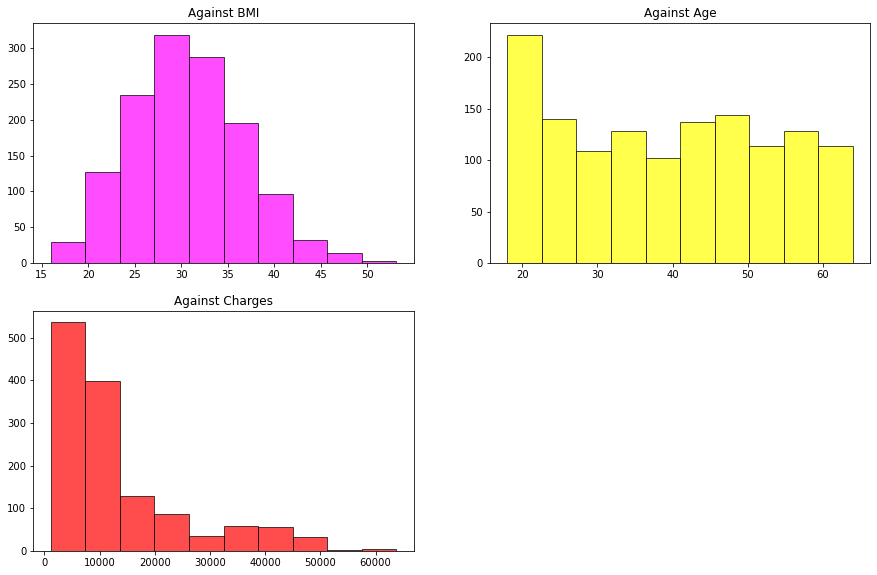

In [11]:
plt.figure(figsize=(15,15))

#1st plot with (3,2) dimensions
plt.subplot(3,2,1)
plt.hist(df.bmi,color="magenta",edgecolor="black",alpha=0.7)
plt.title("Against BMI")

#2nd plot with (3,2) dimensions
plt.subplot(3,2,2)
plt.hist(df.age,color="yellow",edgecolor="black",alpha=0.7)
plt.title("Against Age")

#3rd plot with (3,2) dimensions
plt.subplot(3,2,3)
plt.hist(df.charges,color="red",edgecolor="black",alpha=0.7)
plt.title("Against Charges")

In [12]:
#measure skewness of desired columns
#skewness=>direction of outliers/concentration of data in our dataset
#higher value of skew means more outliers present 
skewness=pd.DataFrame({"Skewness":[stats.skew(df.bmi),stats.skew(df.age),stats.skew(df.charges)]},
                     index=["BMI","Age","Charges"])
skewness

,Skewness
BMI,0.283729
Age,0.055610
Charges,1.514180


In [23]:
#values for x axis
x1=df["smoker"].value_counts().index
x1

Index(['no', 'yes'], dtype='object')

In [32]:
#count for each value in x
y1=[df["smoker"].value_counts()[i] for i in x1]
y1

[1064, 274]

In [31]:
#values for x axis
x2=df["sex"].value_counts().index
x2

Index(['male', 'female'], dtype='object')

In [34]:
#count for each value in x
y2=[df["sex"].value_counts()[i] for i in x2]
y2

[676, 662]

In [38]:
#values for x axis
x3=df["region"].value_counts().index
x3

Index(['southeast', 'southwest', 'northwest', 'northeast'], dtype='object')

In [39]:
#count for each value in x
y3=[df["region"].value_counts()[i] for i in x3]
y3

[364, 325, 325, 324]

In [49]:
x4=df["children"].value_counts().index
x4

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [50]:
y4=[df["children"].value_counts()[i] for i in x4]
y4

[574, 324, 240, 157, 25, 18]

Text(0, 0.5, 'Count')

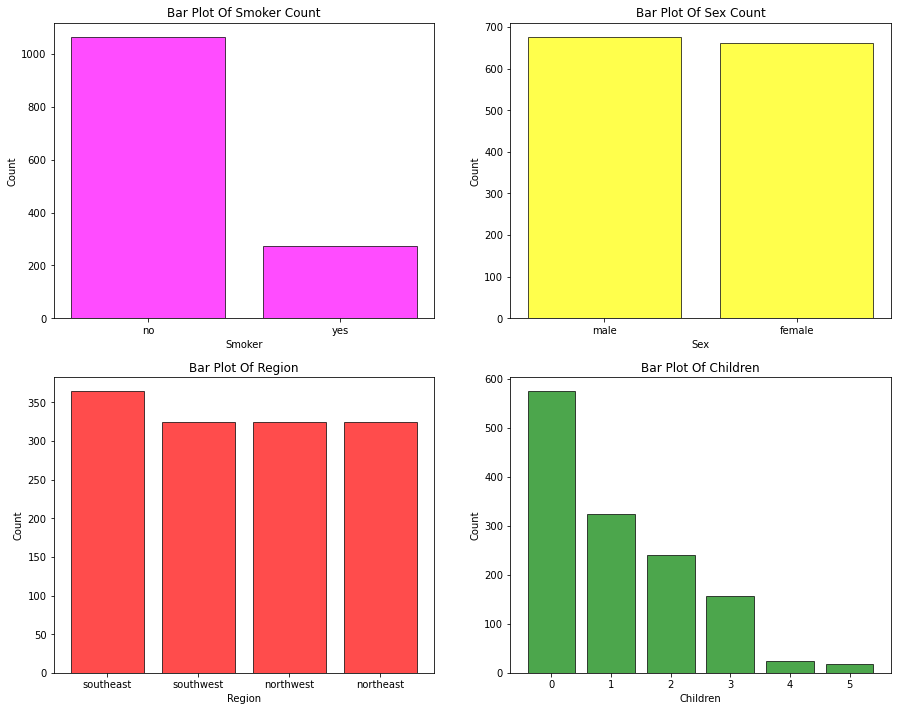

In [53]:
plt.figure(figsize=(15,25))

#1st subplot of dimensions (4,2) 
plt.subplot(4,2,1)
plt.bar(x1,y1,color="magenta",edgecolor="black",alpha=0.7)
plt.title("Bar Plot Of Smoker Count")
plt.xlabel("Smoker")
plt.ylabel("Count")

#2nd subplot of dimensions (4,2)
plt.subplot(4,2,2)
plt.bar(x2,y2,color="yellow",edgecolor="black",alpha=0.7)
plt.title("Bar Plot Of Sex Count")
plt.xlabel("Sex")
plt.ylabel("Count")

#3rd subplot of dimensions (4,2)
plt.subplot(4,2,3)
plt.bar(x3,y3,color="red",edgecolor="black",alpha=0.7)
plt.title("Bar Plot Of Region")
plt.xlabel("Region")
plt.ylabel("Count")

#4th subplot of dimensions (4,2)
plt.subplot(4,2,4)
plt.bar(x4,y4,color="green",edgecolor="black",alpha=0.7)
plt.title("Bar Plot Of Children")
plt.xlabel("Children")
plt.ylabel("Count")

<AxesSubplot:xlabel='age', ylabel='charges'>

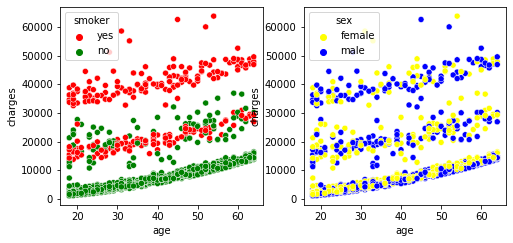

In [75]:
#analyse the trend of two attributes
plt.figure(figsize=(8,8))

#hue=>divide color by this criteria
#palette=>division is done on basis of which colors

plt.subplot(2,2,1)
sns.scatterplot(x=df["age"],y=df["charges"],hue=df["smoker"],palette=["red","green"])

plt.subplot(2,2,2)
sns.scatterplot(x=df["age"],y=df["charges"],hue=df["sex"],palette=["yellow","blue"])

In [77]:
x=np.array(df[df["smoker"]=="yes"]["charges"])
y=np.array(df[df["smoker"]=="no"]["charges"])

#performing independent t-test which measures if there is a significant difference between mean of 2 quantities
#we measure by comparing the significant difference/p value with a significant level
t,p_value=stats.ttest_ind(x,y,axis=0)

#setting significance level at 5%
if p_value<0.05:
    print("Less than 5%")
else:
    print("More than 5%")

Less than 5%
